In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.layers import GRU, Input, Dense, TimeDistributed, LSTM,Embedding
from keras.models import Model, Sequential
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad 
from keras.losses import sparse_categorical_crossentropy, mean_squared_error, binary_crossentropy
import tensorflow
from tensorflow.keras.optimizers import RMSprop

In [2]:
data = pd.read_csv('entrenamiento_aes.csv')
data

,Texto,Texto_cifrado
0,prueba_holaatodo,f6ee9e5d2e493831f47df43fc76675bc
1,Thats my Kung Fu,90e6e02630bab41221ca39093bda36c3
2,abcdefghijklmnop,85627df0451e7740eb260b1df1f4fc64
3,thats a new text,8ccaaef956c6e9b1cc8de9e74f869c32
4,nuevo texto hola,c7304b975b30e503aa037b6baa0e90ea
...,...,...
15011,i(UxNg7d0d9qn8U>,06c12cfbdd976b9ba0eb431eca8fb9c9
15012,|jWuA</lMU{pvl!2,1fd91cf2cacbde51fcbc97f4a4345696
15013,xc-6O{yVX)KFPk^],7a5944e0229d8b6c49a26cac1b755461
15014,e+J|)jU{6.7n3XE/,fb1924c90d7c3be9ec62f00b3c3c4a09


In [3]:
for i in range(len(data['Texto'])):
    if len(data['Texto'][i]) > 16:
        data.drop(i, axis=0, inplace=True)

In [4]:
data['Texto'].apply(str)
data['Texto_cifrado'].apply(str)
data

,Texto,Texto_cifrado
0,prueba_holaatodo,f6ee9e5d2e493831f47df43fc76675bc
1,Thats my Kung Fu,90e6e02630bab41221ca39093bda36c3
2,abcdefghijklmnop,85627df0451e7740eb260b1df1f4fc64
3,thats a new text,8ccaaef956c6e9b1cc8de9e74f869c32
4,nuevo texto hola,c7304b975b30e503aa037b6baa0e90ea
...,...,...
15011,i(UxNg7d0d9qn8U>,06c12cfbdd976b9ba0eb431eca8fb9c9
15012,|jWuA</lMU{pvl!2,1fd91cf2cacbde51fcbc97f4a4345696
15013,xc-6O{yVX)KFPk^],7a5944e0229d8b6c49a26cac1b755461
15014,e+J|)jU{6.7n3XE/,fb1924c90d7c3be9ec62f00b3c3c4a09


In [5]:
#Se procesan los datos
x_tk = Tokenizer(char_level=True)
x_tk.fit_on_texts(data['Texto'])  

preprocess_x, x  = x_tk.texts_to_sequences(data['Texto']), x_tk

In [6]:
preprocess_x #Texto

[[17, 26, 18, 1, 4, 14, 39, 8, 19, 10, 14, 14, 15, 19, 23, 19],
 [15, 8, 14, 15, 13, 45, 25, 24, 45, 9, 18, 2, 11, 45, 12, 18],
 [14, 4, 22, 23, 1, 12, 11, 8, 6, 3, 9, 10, 25, 2, 19, 17],
 [15, 8, 14, 15, 13, 45, 14, 45, 2, 1, 16, 45, 15, 1, 21, 15],
 [2, 18, 1, 5, 19, 45, 15, 1, 21, 15, 19, 45, 8, 19, 10, 14],
 [17, 14, 15, 26, 19, 2, 1, 13, 45, 17, 26, 19, 3, 1, 22, 15],
 [38, 16, 42, 32, 61, 43, 57, 33, 51, 7, 7, 15, 8, 19, 23, 20],
 [63, 28, 51, 42, 68, 4, 10, 28, 26, 34, 5, 33, 2, 17, 30, 39],
 [14, 15, 55, 20, 23, 67, 26, 26, 57, 11, 17, 1, 25, 51, 32, 59],
 [15, 39, 5, 40, 38, 62, 31, 12, 52, 40, 31, 11, 3, 40, 8, 15],
 [9, 39, 6, 14, 14, 47, 49, 57, 10, 16, 1, 67, 3, 54, 58, 9],
 [8, 40, 55, 27, 48, 40, 23, 40, 22, 50, 68, 7, 17, 20, 39, 21],
 [38, 17, 49, 13, 58, 26, 19, 24, 24, 10, 32, 10, 8, 15, 21, 35],
 [2, 8, 7, 26, 18, 55, 11, 54, 49, 35, 21, 14, 42, 62, 10, 35],
 [53, 22, 37, 14, 11, 16, 54, 49, 25, 50, 31, 37, 19, 21, 49, 14],
 [5, 65, 23, 20, 6, 59, 15, 68, 39, 25, 51

In [7]:
y_tk = Tokenizer(char_level=True)
y_tk.fit_on_texts(data['Texto_cifrado'])  

preprocess_y, y = y_tk.texts_to_sequences(data['Texto_cifrado']), y_tk

In [8]:
length_x = max([len(sentence) for sentence in preprocess_x])
print(length_x)

length_y = max([len(sentence) for sentence in preprocess_y])
print(length_y)

16
32


In [9]:
preprocess_x = pad_sequences(preprocess_x,maxlen=length_x,padding="post", truncating="post")
preprocess_y = pad_sequences(preprocess_y,maxlen=length_y,padding="post", truncating="post")

In [10]:
preprocess_x[0] #Texto

array([17, 26, 18,  1,  4, 14, 39,  8, 19, 10, 14, 14, 15, 19, 23, 19],
      dtype=int32)

In [11]:
preprocess_y[0] #Texto cifrado

array([ 5,  8,  2,  2, 15,  2, 10,  1,  9,  2, 11, 15,  3, 14,  3, 16,  5,
       11,  6,  1,  5, 11,  3,  5, 13,  6,  8,  8,  6, 10,  4, 13],
      dtype=int32)

In [12]:
x.word_counts

OrderedDict([('p', 5056),
             ('r', 4880),
             ('u', 5054),
             ('e', 5263),
             ('b', 5171),
             ('a', 5093),
             ('_', 2596),
             ('h', 5144),
             ('o', 5052),
             ('l', 5118),
             ('t', 5090),
             ('d', 5002),
             ('s', 5109),
             (' ', 2574),
             ('m', 4951),
             ('y', 4990),
             ('k', 5141),
             ('n', 5262),
             ('g', 5116),
             ('f', 5114),
             ('c', 5007),
             ('i', 5145),
             ('j', 5244),
             ('w', 5068),
             ('x', 5041),
             ('v', 5158),
             ('|', 2598),
             ('/', 2591),
             ('%', 2627),
             ('3', 2525),
             ('.', 2589),
             ('`', 2534),
             ('!', 2624),
             ('^', 2548),
             ('q', 5145),
             ('z', 5043),
             (':', 2519),
             ('6', 2656),
            

In [13]:
y.word_counts

OrderedDict([('f', 30195),
             ('6', 30093),
             ('e', 30222),
             ('9', 29750),
             ('5', 30050),
             ('d', 30263),
             ('2', 30061),
             ('4', 30020),
             ('3', 30219),
             ('8', 29774),
             ('1', 29709),
             ('7', 30119),
             ('c', 29818),
             ('b', 30218),
             ('0', 29896),
             ('a', 30105)])

In [14]:
preprocess_y_exm = preprocess_y.reshape(*preprocess_y.shape, 1)
preprocess_y_exm

array([[[ 5],
        [ 8],
        [ 2],
        ...,
        [10],
        [ 4],
        [13]],

       [[15],
        [12],
        [ 2],
        ...,
        [ 8],
        [13],
        [ 3]],

       [[14],
        [10],
        [ 8],
        ...,
        [13],
        [ 8],
        [11]],

       ...,

       [[ 6],
        [ 7],
        [10],
        ...,
        [11],
        [ 8],
        [16]],

       [[ 5],
        [ 4],
        [16],
        ...,
        [ 7],
        [12],
        [15]],

       [[ 4],
        [ 8],
        [ 4],
        ...,
        [ 2],
        [ 8],
        [15]]], dtype=int32)

In [15]:
preprocess_y_exm[0]

array([[ 5],
       [ 8],
       [ 2],
       [ 2],
       [15],
       [ 2],
       [10],
       [ 1],
       [ 9],
       [ 2],
       [11],
       [15],
       [ 3],
       [14],
       [ 3],
       [16],
       [ 5],
       [11],
       [ 6],
       [ 1],
       [ 5],
       [11],
       [ 3],
       [ 5],
       [13],
       [ 6],
       [ 8],
       [ 8],
       [ 6],
       [10],
       [ 4],
       [13]], dtype=int32)

In [16]:
#Construccion del modelo
def lstm(input, output_sequence_length, code_size, plaintext_size):
    x = Input(shape=input[1:])   
    seq = LSTM(units= 128, return_sequences = True, name='Layer1')(x)
    seq = LSTM(units= 128, return_sequences = True, name='Layer2')(seq)
    output = TimeDistributed(Dense(units = plaintext_size, activation='softmax', name='Layer3'))(seq)
    model = Model(inputs = x, outputs = output)
    model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])
    model.summary()
    return model


In [17]:
preprocess_y_exm.shape

(15016, 32, 1)

In [18]:
preprocess_x.shape

(15016, 16)

In [19]:
preprocess_y_exm.shape[1]

32

In [20]:
tmp_x = pad_sequences(preprocess_x,maxlen=preprocess_y_exm.shape[1],padding="post", truncating="post")
tmp_x = tmp_x.reshape((-1, preprocess_y_exm.shape[-2], 1)) 

In [21]:
len(tmp_x[0])

32

In [22]:
tmp_x

array([[[17],
        [26],
        [18],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[15],
        [ 8],
        [14],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[14],
        [ 4],
        [22],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       ...,

       [[21],
        [22],
        [47],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 1],
        [58],
        [ 3],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[13],
        [ 8],
        [39],
        ...,
        [ 0],
        [ 0],
        [ 0]]], dtype=int32)

In [ ]:
model = lstm(tmp_x.shape,preprocess_y_exm.shape[1],len(x.word_index)+1,len(y.word_index)+1)

In [ ]:
model.summary()


In [35]:
#Entrenamiento
h=model.fit(tmp_x, preprocess_y_exm, batch_size=512, epochs=500, validation_split=0.3)


Epoch 1/500
21/21 [==============================] - 6s 68ms/step - loss: 2.7861 - accuracy: 0.0623 - val_loss: 2.7759 - val_accuracy: 0.0624
Epoch 2/500
21/21 [==============================] - 0s 18ms/step - loss: 2.7752 - accuracy: 0.0621 - val_loss: 2.7746 - val_accuracy: 0.0628
Epoch 3/500
21/21 [==============================] - 0s 18ms/step - loss: 2.7744 - accuracy: 0.0628 - val_loss: 2.7744 - val_accuracy: 0.0624
Epoch 4/500
21/21 [==============================] - 0s 18ms/step - loss: 2.7742 - accuracy: 0.0641 - val_loss: 2.7739 - val_accuracy: 0.0624
Epoch 5/500
21/21 [==============================] - 0s 18ms/step - loss: 2.7740 - accuracy: 0.0630 - val_loss: 2.7743 - val_accuracy: 0.0621
Epoch 6/500
21/21 [==============================] - 0s 18ms/step - loss: 2.7741 - accuracy: 0.0630 - val_loss: 2.7738 - val_accuracy: 0.0625
Epoch 7/500
21/21 [==============================] - 0s 18ms/step - loss: 2.7738 - accuracy: 0.0633 - val_loss: 2.7737 - val_accuracy: 0.0628
Epoch 

In [37]:
prueba = x_tk.texts_to_sequences(data)
test_sequences_matrix = sequence.pad_sequences(prueba,maxlen=length_y)

In [38]:
test_sequences_matrix.shape

(2, 32)

In [39]:
h.history["accuracy"]

[0.0622621551156044,
 0.062086742371320724,
 0.06283893436193466,
 0.06405194848775864,
 0.06296379864215851,
 0.06301434338092804,
 0.06331462413072586,
 0.0627051442861557,
 0.0632343515753746,
 0.06320461630821228,
 0.06340381503105164,
 0.06370409578084946,
 0.06366544216871262,
 0.06293109804391861,
 0.06255946308374405,
 0.06331462413072586,
 0.06367436796426773,
 0.06325516104698181,
 0.06357625126838684,
 0.06401924043893814,
 0.06333543360233307,
 0.06345733255147934,
 0.06379328668117523,
 0.06448303908109665,
 0.06425708532333374,
 0.06360301375389099,
 0.06393004953861237,
 0.0641530305147171,
 0.06393599510192871,
 0.06417681276798248,
 0.0645960196852684,
 0.0640014037489891,
 0.0640668123960495,
 0.06495576351881027,
 0.06437303870916367,
 0.06453655660152435,
 0.0648873820900917,
 0.06465845555067062,
 0.06483981013298035,
 0.0656009167432785,
 0.06483089178800583,
 0.06485467404127121,
 0.06485170125961304,
 0.06505981832742691,
 0.06519360840320587,
 0.064593046903610

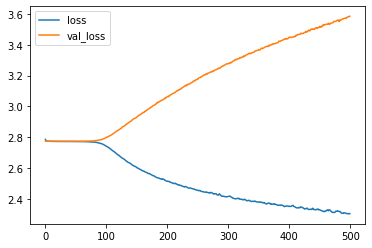

In [40]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.legend(['loss', 'val_loss'])



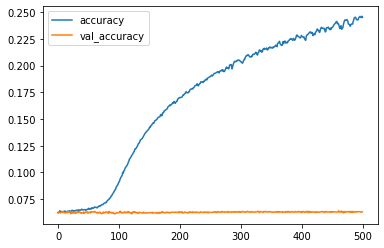

In [41]:
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.legend(['accuracy', 'val_accuracy'])


In [42]:
model.predict(test_sequences_matrix)

array([[[2.1864058e-02, 6.5904371e-02, 9.0486415e-02, ...,
         5.2954417e-02, 5.3376902e-02, 5.7795782e-02],
        [1.3010780e-02, 8.1193864e-02, 1.3516174e-01, ...,
         4.4685710e-02, 4.6491880e-02, 5.6887582e-02],
        [9.3950825e-03, 1.0852887e-01, 2.0287530e-01, ...,
         3.2460097e-02, 4.5072056e-02, 5.7277735e-02],
        ...,
        [1.8901366e-05, 4.8692297e-02, 2.4328722e-02, ...,
         3.0020036e-02, 3.5660751e-02, 3.7650024e-03],
        [1.3404866e-06, 6.5086663e-02, 2.6342362e-02, ...,
         3.5538260e-02, 3.7073620e-02, 1.4022462e-02],
        [7.4165463e-08, 1.4256386e-01, 4.8904821e-02, ...,
         6.6102967e-02, 3.1273987e-02, 2.3064742e-02]],

       [[2.1864058e-02, 6.5904371e-02, 9.0486415e-02, ...,
         5.2954417e-02, 5.3376902e-02, 5.7795782e-02],
        [1.3010780e-02, 8.1193864e-02, 1.3516174e-01, ...,
         4.4685710e-02, 4.6491880e-02, 5.6887582e-02],
        [9.3950825e-03, 1.0852887e-01, 2.0287530e-01, ...,
         3.246

In [ ]:
data.shape

(15016, 2)